<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/7_AdvancedConcepts/CIFAR10_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-_1y50tbk
  Running command git clone -q https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-_1y50tbk
  Created wheel for albumentations: filename=albumentations-1.0.0-cp37-none-any.whl size=98151 sha256=25796d3413fec5a08b0951e5455f4934bbfbae5ea7a64815de2c62e2ec4cee88
  Stored in directory: /tmp/pip-ephem-wheel-cache-a53phlcg/wheels/e2/85/3e/2a40fac5cc1f43ced656603bb2fca1327b30ec7de1b1b66517
Successfully built albumentations


In [3]:
from __future__ import print_function
BASE_DIR='/content/drive/MyDrive/cifar10'
%cd $BASE_DIR
from utils import plot_metrics,train,test,helper
from model import model
import torch
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt



from dataloader.load_data import Cifar10DataLoader
from utils.engine import TriggerEngine

/content/drive/MyDrive/cifar10


## Load config file

In [4]:
config = helper.process_config("./config/cifar_config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_prob': 0.5,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate': 20,
                                'rotate_limit': 15,
                                'scale_limit': 0.1,
                                'shift_limit': 0.1,
                                'shiftscalerotate_prob': 0.25},
                       'type': 'albumentation'},
 'data_loader': {'args': {'batch_size': 256,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
               

## Download data and view sample images

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


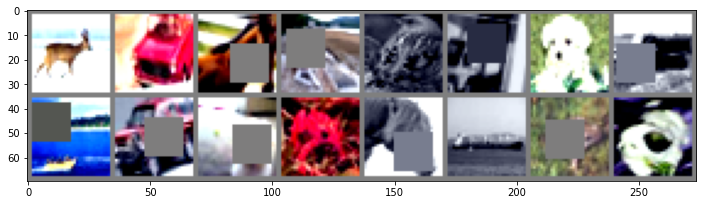

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision 

# functions to show an image
cifar_dataset=Cifar10DataLoader(config)
classes= config['data_loader']['classes']
fig, ax = plt.subplots(figsize=(12, 12))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(cifar_dataset.train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:16]))

## Trigger training

In [6]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']

trigger_training=TriggerEngine(config)

# trigger_training.
(exp_metrics[experiment_name]),model = trigger_training.run_experiment()
trigger_training.save_experiment(model,experiment_name)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=1.8157612085342407 Batch_id=195 LR=0.00043 Accuracy=29.73: 100%|██████████| 196/196 [00:13<00:00, 14.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0067, Accuracy: 4403/10000 (44.03%)

Epoch 2:


Loss=1.6971899271011353 Batch_id=195 LR=0.00053 Accuracy=42.05: 100%|██████████| 196/196 [00:13<00:00, 14.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0059, Accuracy: 5107/10000 (51.07%)

Epoch 3:


Loss=1.5252890586853027 Batch_id=195 LR=0.00069 Accuracy=49.34: 100%|██████████| 196/196 [00:13<00:00, 15.06it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0053, Accuracy: 5822/10000 (58.22%)

Epoch 4:


Loss=1.5753307342529297 Batch_id=195 LR=0.00091 Accuracy=54.58: 100%|██████████| 196/196 [00:13<00:00, 14.94it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 6410/10000 (64.10%)

Epoch 5:


Loss=1.2116146087646484 Batch_id=195 LR=0.00119 Accuracy=58.49: 100%|██████████| 196/196 [00:13<00:00, 14.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0042, Accuracy: 6688/10000 (66.88%)

Epoch 6:


Loss=1.1855604648590088 Batch_id=195 LR=0.00152 Accuracy=60.97: 100%|██████████| 196/196 [00:13<00:00, 15.00it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 6848/10000 (68.48%)

Epoch 7:


Loss=1.2824833393096924 Batch_id=195 LR=0.00191 Accuracy=63.21: 100%|██████████| 196/196 [00:12<00:00, 15.17it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 7112/10000 (71.12%)

Epoch 8:


Loss=1.1161034107208252 Batch_id=195 LR=0.00233 Accuracy=64.30: 100%|██████████| 196/196 [00:12<00:00, 15.14it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7096/10000 (70.96%)

Epoch 9:


Loss=1.2015957832336426 Batch_id=195 LR=0.00280 Accuracy=65.54: 100%|██████████| 196/196 [00:13<00:00, 14.97it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6899/10000 (68.99%)

Epoch 10:


Loss=0.972204327583313 Batch_id=195 LR=0.00330 Accuracy=66.49: 100%|██████████| 196/196 [00:13<00:00, 15.05it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7173/10000 (71.73%)

Epoch 11:


Loss=1.0752757787704468 Batch_id=195 LR=0.00382 Accuracy=67.32: 100%|██████████| 196/196 [00:13<00:00, 14.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7464/10000 (74.64%)

Epoch 12:


Loss=1.1224806308746338 Batch_id=195 LR=0.00437 Accuracy=67.60: 100%|██████████| 196/196 [00:12<00:00, 15.14it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7512/10000 (75.12%)

Epoch 13:


Loss=0.929984450340271 Batch_id=195 LR=0.00492 Accuracy=68.13: 100%|██████████| 196/196 [00:13<00:00, 14.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7588/10000 (75.88%)

Epoch 14:


Loss=1.0915356874465942 Batch_id=195 LR=0.00548 Accuracy=68.55: 100%|██████████| 196/196 [00:13<00:00, 14.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 7210/10000 (72.10%)

Epoch 15:


Loss=1.0311555862426758 Batch_id=195 LR=0.00604 Accuracy=69.02: 100%|██████████| 196/196 [00:13<00:00, 15.00it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7374/10000 (73.74%)

Epoch 16:


Loss=1.0856763124465942 Batch_id=195 LR=0.00658 Accuracy=69.53: 100%|██████████| 196/196 [00:13<00:00, 14.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7554/10000 (75.54%)

Epoch 17:


Loss=0.873822808265686 Batch_id=195 LR=0.00710 Accuracy=69.89: 100%|██████████| 196/196 [00:13<00:00, 14.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7567/10000 (75.67%)

Epoch 18:


Loss=0.8220279812812805 Batch_id=195 LR=0.00760 Accuracy=70.22: 100%|██████████| 196/196 [00:13<00:00, 14.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7706/10000 (77.06%)

Epoch 19:


Loss=0.8763521313667297 Batch_id=195 LR=0.00807 Accuracy=70.25: 100%|██████████| 196/196 [00:13<00:00, 15.05it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7245/10000 (72.45%)

Epoch 20:


Loss=0.9448914527893066 Batch_id=195 LR=0.00850 Accuracy=70.18: 100%|██████████| 196/196 [00:13<00:00, 15.02it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7783/10000 (77.83%)

Epoch 21:


Loss=0.7645619511604309 Batch_id=195 LR=0.00888 Accuracy=70.88: 100%|██████████| 196/196 [00:13<00:00, 14.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7622/10000 (76.22%)

Epoch 22:


Loss=0.7502024173736572 Batch_id=195 LR=0.00921 Accuracy=70.73: 100%|██████████| 196/196 [00:13<00:00, 14.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7520/10000 (75.20%)

Epoch 23:


Loss=0.8975468873977661 Batch_id=195 LR=0.00949 Accuracy=71.18: 100%|██████████| 196/196 [00:13<00:00, 14.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7306/10000 (73.06%)

Epoch 24:


Loss=0.9252076148986816 Batch_id=195 LR=0.00971 Accuracy=71.15: 100%|██████████| 196/196 [00:13<00:00, 14.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7673/10000 (76.73%)

Epoch 25:


Loss=1.0162906646728516 Batch_id=195 LR=0.00987 Accuracy=71.34: 100%|██████████| 196/196 [00:13<00:00, 14.84it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7829/10000 (78.29%)

Epoch 26:


Loss=1.0726380348205566 Batch_id=195 LR=0.00997 Accuracy=71.59: 100%|██████████| 196/196 [00:13<00:00, 14.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0031, Accuracy: 7371/10000 (73.71%)

Epoch 27:


Loss=0.8132162094116211 Batch_id=195 LR=0.01000 Accuracy=71.67: 100%|██████████| 196/196 [00:13<00:00, 14.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7237/10000 (72.37%)

Epoch 28:


Loss=0.860663115978241 Batch_id=195 LR=0.00999 Accuracy=71.93: 100%|██████████| 196/196 [00:13<00:00, 15.00it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7833/10000 (78.33%)

Epoch 29:


Loss=0.8980503082275391 Batch_id=195 LR=0.00998 Accuracy=71.83: 100%|██████████| 196/196 [00:13<00:00, 14.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7633/10000 (76.33%)

Epoch 30:


Loss=0.9027805328369141 Batch_id=195 LR=0.00994 Accuracy=72.10: 100%|██████████| 196/196 [00:13<00:00, 14.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7521/10000 (75.21%)

Epoch 31:


Loss=0.8784531354904175 Batch_id=195 LR=0.00990 Accuracy=71.91: 100%|██████████| 196/196 [00:13<00:00, 14.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0029, Accuracy: 7542/10000 (75.42%)

Epoch 32:


Loss=0.796281099319458 Batch_id=195 LR=0.00985 Accuracy=72.32: 100%|██████████| 196/196 [00:13<00:00, 14.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7883/10000 (78.83%)

Epoch 33:


Loss=0.803052544593811 Batch_id=195 LR=0.00978 Accuracy=72.16: 100%|██████████| 196/196 [00:13<00:00, 14.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7617/10000 (76.17%)

Epoch 34:


Loss=0.9386650919914246 Batch_id=195 LR=0.00970 Accuracy=72.50: 100%|██████████| 196/196 [00:13<00:00, 14.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7672/10000 (76.72%)

Epoch 35:


Loss=0.6616663336753845 Batch_id=195 LR=0.00961 Accuracy=72.48: 100%|██████████| 196/196 [00:13<00:00, 14.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7699/10000 (76.99%)

Epoch 36:


Loss=0.7724964022636414 Batch_id=195 LR=0.00950 Accuracy=72.27: 100%|██████████| 196/196 [00:13<00:00, 14.88it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7696/10000 (76.96%)

Epoch 37:


Loss=0.7191616296768188 Batch_id=195 LR=0.00939 Accuracy=72.46: 100%|██████████| 196/196 [00:13<00:00, 14.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7669/10000 (76.69%)

Epoch 38:


Loss=0.7593615055084229 Batch_id=195 LR=0.00927 Accuracy=72.73: 100%|██████████| 196/196 [00:13<00:00, 14.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7643/10000 (76.43%)

Epoch 39:


Loss=0.971085250377655 Batch_id=195 LR=0.00913 Accuracy=72.83: 100%|██████████| 196/196 [00:13<00:00, 14.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7636/10000 (76.36%)

Epoch 40:


Loss=0.8566627502441406 Batch_id=195 LR=0.00898 Accuracy=72.58: 100%|██████████| 196/196 [00:13<00:00, 15.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7980/10000 (79.80%)

Epoch 41:


Loss=0.7306380271911621 Batch_id=195 LR=0.00883 Accuracy=73.29: 100%|██████████| 196/196 [00:13<00:00, 14.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8035/10000 (80.35%)

Epoch 42:


Loss=0.9230624437332153 Batch_id=195 LR=0.00866 Accuracy=73.00: 100%|██████████| 196/196 [00:13<00:00, 14.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7907/10000 (79.07%)

Epoch 43:


Loss=0.6876984238624573 Batch_id=195 LR=0.00849 Accuracy=73.50: 100%|██████████| 196/196 [00:13<00:00, 14.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8070/10000 (80.70%)

Epoch 44:


Loss=0.6401318311691284 Batch_id=195 LR=0.00831 Accuracy=73.51: 100%|██████████| 196/196 [00:13<00:00, 14.78it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7657/10000 (76.57%)

Epoch 45:


Loss=0.6936231851577759 Batch_id=195 LR=0.00812 Accuracy=73.53: 100%|██████████| 196/196 [00:13<00:00, 14.55it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7931/10000 (79.31%)

Epoch 46:


Loss=0.77703458070755 Batch_id=195 LR=0.00792 Accuracy=73.59: 100%|██████████| 196/196 [00:13<00:00, 14.60it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7903/10000 (79.03%)

Epoch 47:


Loss=1.0207821130752563 Batch_id=195 LR=0.00771 Accuracy=74.11: 100%|██████████| 196/196 [00:13<00:00, 14.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8030/10000 (80.30%)

Epoch 48:


Loss=0.7115458250045776 Batch_id=195 LR=0.00750 Accuracy=74.43: 100%|██████████| 196/196 [00:13<00:00, 14.52it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 7964/10000 (79.64%)

Epoch 49:


Loss=0.8598322868347168 Batch_id=195 LR=0.00728 Accuracy=74.35: 100%|██████████| 196/196 [00:13<00:00, 14.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8018/10000 (80.18%)

Epoch 50:


Loss=0.9329501986503601 Batch_id=195 LR=0.00706 Accuracy=74.42: 100%|██████████| 196/196 [00:13<00:00, 14.75it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8104/10000 (81.04%)

Epoch 51:


Loss=0.8705116510391235 Batch_id=195 LR=0.00683 Accuracy=74.60: 100%|██████████| 196/196 [00:13<00:00, 14.83it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8064/10000 (80.64%)

Epoch 52:


Loss=0.7927528023719788 Batch_id=195 LR=0.00659 Accuracy=75.06: 100%|██████████| 196/196 [00:13<00:00, 14.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8142/10000 (81.42%)

Epoch 53:


Loss=0.81486576795578 Batch_id=195 LR=0.00635 Accuracy=75.10: 100%|██████████| 196/196 [00:13<00:00, 14.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8212/10000 (82.12%)

Epoch 54:


Loss=0.7524766325950623 Batch_id=195 LR=0.00611 Accuracy=75.22: 100%|██████████| 196/196 [00:13<00:00, 14.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7996/10000 (79.96%)

Epoch 55:


Loss=0.7819115519523621 Batch_id=195 LR=0.00587 Accuracy=75.84: 100%|██████████| 196/196 [00:13<00:00, 14.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8204/10000 (82.04%)

Epoch 56:


Loss=0.7128491997718811 Batch_id=195 LR=0.00562 Accuracy=75.92: 100%|██████████| 196/196 [00:13<00:00, 14.76it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8249/10000 (82.49%)

Epoch 57:


Loss=0.5029627680778503 Batch_id=195 LR=0.00537 Accuracy=76.42: 100%|██████████| 196/196 [00:13<00:00, 14.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8070/10000 (80.70%)

Epoch 58:


Loss=0.9038219451904297 Batch_id=195 LR=0.00512 Accuracy=76.32: 100%|██████████| 196/196 [00:13<00:00, 14.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8039/10000 (80.39%)

Epoch 59:


Loss=0.7866315841674805 Batch_id=195 LR=0.00487 Accuracy=76.77: 100%|██████████| 196/196 [00:13<00:00, 14.65it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8172/10000 (81.72%)

Epoch 60:


Loss=0.6841269135475159 Batch_id=195 LR=0.00463 Accuracy=76.97: 100%|██████████| 196/196 [00:13<00:00, 14.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8265/10000 (82.65%)

Epoch 61:


Loss=0.9255181550979614 Batch_id=195 LR=0.00438 Accuracy=77.09: 100%|██████████| 196/196 [00:13<00:00, 14.64it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8356/10000 (83.56%)

Epoch 62:


Loss=0.8101263046264648 Batch_id=195 LR=0.00413 Accuracy=77.68: 100%|██████████| 196/196 [00:13<00:00, 14.86it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8354/10000 (83.54%)

Epoch 63:


Loss=0.6310976147651672 Batch_id=195 LR=0.00389 Accuracy=77.80: 100%|██████████| 196/196 [00:13<00:00, 14.82it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0020, Accuracy: 8355/10000 (83.55%)

Epoch 64:


Loss=0.6932340264320374 Batch_id=195 LR=0.00364 Accuracy=78.05: 100%|██████████| 196/196 [00:13<00:00, 14.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8428/10000 (84.28%)

Epoch 65:


Loss=0.6574146151542664 Batch_id=195 LR=0.00341 Accuracy=78.15: 100%|██████████| 196/196 [00:13<00:00, 14.70it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0019, Accuracy: 8403/10000 (84.03%)

Epoch 66:


Loss=0.5404479503631592 Batch_id=195 LR=0.00317 Accuracy=78.65: 100%|██████████| 196/196 [00:13<00:00, 14.69it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8454/10000 (84.54%)

Epoch 67:


Loss=0.7492390871047974 Batch_id=195 LR=0.00294 Accuracy=79.14: 100%|██████████| 196/196 [00:13<00:00, 14.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8461/10000 (84.61%)

Epoch 68:


Loss=0.4974350035190582 Batch_id=195 LR=0.00272 Accuracy=79.52: 100%|██████████| 196/196 [00:13<00:00, 14.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8499/10000 (84.99%)

Epoch 69:


Loss=0.6212974786758423 Batch_id=195 LR=0.00250 Accuracy=79.58: 100%|██████████| 196/196 [00:13<00:00, 14.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8512/10000 (85.12%)

Epoch 70:


Loss=0.7562334537506104 Batch_id=195 LR=0.00229 Accuracy=80.02: 100%|██████████| 196/196 [00:13<00:00, 14.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8557/10000 (85.57%)

Epoch 71:


Loss=0.4102335572242737 Batch_id=195 LR=0.00208 Accuracy=80.31: 100%|██████████| 196/196 [00:13<00:00, 14.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8504/10000 (85.04%)

Epoch 72:


Loss=0.5572588443756104 Batch_id=195 LR=0.00188 Accuracy=80.50: 100%|██████████| 196/196 [00:13<00:00, 14.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8598/10000 (85.98%)

Epoch 73:


Loss=0.5999433398246765 Batch_id=195 LR=0.00169 Accuracy=80.77: 100%|██████████| 196/196 [00:13<00:00, 14.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0018, Accuracy: 8514/10000 (85.14%)

Epoch 74:


Loss=0.4805801510810852 Batch_id=195 LR=0.00151 Accuracy=80.92: 100%|██████████| 196/196 [00:13<00:00, 14.80it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8612/10000 (86.12%)

Epoch 75:


Loss=0.4769376218318939 Batch_id=195 LR=0.00133 Accuracy=81.66: 100%|██████████| 196/196 [00:13<00:00, 14.61it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0017, Accuracy: 8597/10000 (85.97%)

Epoch 76:


Loss=0.5031522512435913 Batch_id=195 LR=0.00117 Accuracy=82.02: 100%|██████████| 196/196 [00:13<00:00, 14.43it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8613/10000 (86.13%)

Epoch 77:


Loss=0.7842293381690979 Batch_id=195 LR=0.00101 Accuracy=82.01: 100%|██████████| 196/196 [00:13<00:00, 14.48it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8622/10000 (86.22%)

Epoch 78:


Loss=0.42937523126602173 Batch_id=195 LR=0.00087 Accuracy=82.63: 100%|██████████| 196/196 [00:13<00:00, 14.85it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8667/10000 (86.67%)

Epoch 79:


Loss=0.6347460746765137 Batch_id=195 LR=0.00073 Accuracy=82.65: 100%|██████████| 196/196 [00:13<00:00, 14.66it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8683/10000 (86.83%)

Epoch 80:


Loss=0.5529833436012268 Batch_id=195 LR=0.00061 Accuracy=82.65: 100%|██████████| 196/196 [00:13<00:00, 14.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8689/10000 (86.89%)

Epoch 81:


Loss=0.6193856000900269 Batch_id=195 LR=0.00049 Accuracy=82.99: 100%|██████████| 196/196 [00:13<00:00, 14.77it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0016, Accuracy: 8690/10000 (86.90%)

Epoch 82:


Loss=0.5417891144752502 Batch_id=195 LR=0.00039 Accuracy=83.46: 100%|██████████| 196/196 [00:13<00:00, 14.62it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8723/10000 (87.23%)

Epoch 83:


Loss=0.3278335630893707 Batch_id=195 LR=0.00030 Accuracy=83.37: 100%|██████████| 196/196 [00:13<00:00, 14.51it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8721/10000 (87.21%)

Epoch 84:


Loss=0.4475064277648926 Batch_id=195 LR=0.00022 Accuracy=83.45: 100%|██████████| 196/196 [00:13<00:00, 14.73it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8722/10000 (87.22%)

Epoch 85:


Loss=0.42913955450057983 Batch_id=195 LR=0.00015 Accuracy=83.69: 100%|██████████| 196/196 [00:13<00:00, 14.72it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8763/10000 (87.63%)

Epoch 86:


Loss=0.6078574657440186 Batch_id=195 LR=0.00010 Accuracy=83.96: 100%|██████████| 196/196 [00:13<00:00, 14.56it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8748/10000 (87.48%)

Epoch 87:


Loss=0.47837167978286743 Batch_id=195 LR=0.00006 Accuracy=83.91: 100%|██████████| 196/196 [00:13<00:00, 14.68it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8760/10000 (87.60%)

Epoch 88:


Loss=0.47076621651649475 Batch_id=195 LR=0.00002 Accuracy=83.92: 100%|██████████| 196/196 [00:13<00:00, 14.50it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8753/10000 (87.53%)

Epoch 89:


Loss=0.6713374257087708 Batch_id=195 LR=0.00001 Accuracy=83.97: 100%|██████████| 196/196 [00:13<00:00, 14.79it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0015, Accuracy: 8748/10000 (87.48%)

Epoch 90:


Loss=0.35280245542526245 Batch_id=195 LR=0.00000 Accuracy=83.97: 100%|██████████| 196/196 [00:13<00:00, 14.77it/s]



Test set: Average loss: 0.0015, Accuracy: 8759/10000 (87.59%)

Saving the model for cifar10_with_skipconnection


## Model summary

In [7]:
trigger_training.model_summary(model,(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
         Dropout2d-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
         Dropout2d-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]           2,080
             ReLU-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           9,216
             ReLU-12           [-1, 32, 16, 16]               0
      BatchNorm2d-13           [-1, 32, 16, 16]              64
        Dropout2d-14           [-1, 32,

## Missclassification

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total wrong predictions are 1241


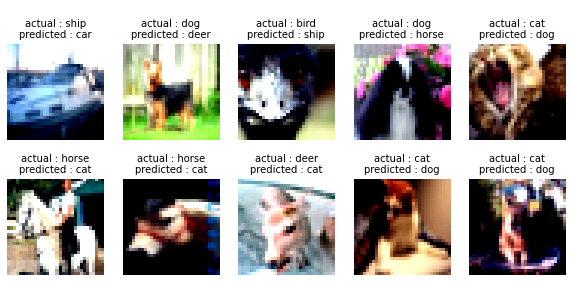

In [8]:
model = torch.load(f'./saved_models/{experiment_name}.pt')
model.eval()
trigger_training.wrong_predictions(model)

## Plots for Validation Loss and Accuracy

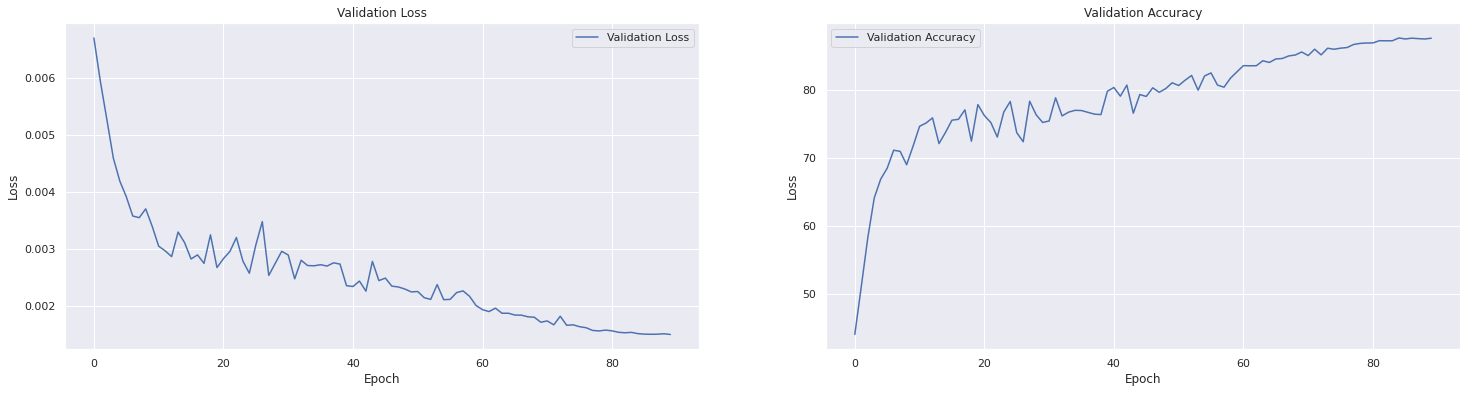

In [9]:
plot_metrics.plot_metrics(exp_metrics[experiment_name])

## Accuracy for each class

In [10]:
helper.class_level_accuracy(model, cifar_dataset.test_loader, device, classes)

Accuracy of plane : 90 %
Accuracy of   car : 95 %
Accuracy of  bird : 81 %
Accuracy of   cat : 70 %
Accuracy of  deer : 88 %
Accuracy of   dog : 80 %
Accuracy of  frog : 92 %
Accuracy of horse : 91 %
Accuracy of  ship : 92 %
Accuracy of truck : 93 %
